___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [114]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('./DATA/Telco-Customer-Churn.csv')

In [116]:
df.head()

customerID 
 gender 
 SeniorCitizen 
 Partner 
 Dependents 
 tenure 
 PhoneService 
 MultipleLines 
 InternetService 
 OnlineSecurity 
 ... 
 DeviceProtection 
 TechSupport 
 StreamingTV 
 StreamingMovies 
 Contract 
 PaperlessBilling 
 PaymentMethod 
 MonthlyCharges 
 TotalCharges 
 Churn 
 
 
 
 
 0 
 7590-VHVEG 
 Female 
 0 
 Yes 
 No 
 1 
 No 
 No phone service 
 DSL 
 No 
 ... 
 No 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Electronic check 
 29.85 
 29.85 
 No 
 
 
 1 
 5575-GNVDE 
 Male 
 0 
 No 
 No 
 34 
 Yes 
 No 
 DSL 
 Yes 
 ... 
 Yes 
 No 
 No 
 No 
 One year 
 No 
 Mailed check 
 56.95 
 1889.50 
 No 
 
 
 2 
 3668-QPYBK 
 Male 
 0 
 No 
 No 
 2 
 Yes 
 No 
 DSL 
 Yes 
 ... 
 No 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Mailed check 
 53.85 
 108.15 
 Yes 
 
 
 3 
 7795-CFOCW 
 Male 
 0 
 No 
 No 
 45 
 No 
 No phone service 
 DSL 
 Yes 
 ... 
 Yes 
 Yes 
 No 
 No 
 One year 
 No 
 Bank transfer (automatic) 
 42.30 
 1840.75 
 No 
 
 
 4 
 9237-HQITU 
 Female 
 0 
 No 
 No 
 2 
 Yes 
 No 
 Fiber optic 
 No 
 ... 
 No 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Electronic check 
 70.70 
 151.65 
 Yes 
 
 
 
 5 rows × 21 columns

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [117]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [118]:
# CODE HERE
df.describe()

SeniorCitizen 
 tenure 
 MonthlyCharges 
 TotalCharges 
 
 
 
 
 count 
 7032.000000 
 7032.000000 
 7032.000000 
 7032.000000 
 
 
 mean 
 0.162400 
 32.421786 
 64.798208 
 2283.300441 
 
 
 std 
 0.368844 
 24.545260 
 30.085974 
 2266.771362 
 
 
 min 
 0.000000 
 1.000000 
 18.250000 
 18.800000 
 
 
 25% 
 0.000000 
 9.000000 
 35.587500 
 401.450000 
 
 
 50% 
 0.000000 
 29.000000 
 70.350000 
 1397.475000 
 
 
 75% 
 0.000000 
 55.000000 
 89.862500 
 3794.737500 
 
 
 max 
 1.000000 
 72.000000 
 118.750000 
 8684.800000

In [119]:

# CODE HERE
# Find unique values for all columns
for column in df.columns:
    print('\n', column, ': ')
    print(df[column].unique())


 customerID : 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender : 
['Female' 'Male']

 SeniorCitizen : 
[0 1]

 Partner : 
['Yes' 'No']

 Dependents : 
['No' 'Yes']

 tenure : 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

 PhoneService : 
['No' 'Yes']

 MultipleLines : 
['No phone service' 'No' 'Yes']

 InternetService : 
['DSL' 'Fiber optic' 'No']

 OnlineSecurity : 
['No' 'Yes' 'No internet service']

 OnlineBackup : 
['Yes' 'No' 'No internet service']

 DeviceProtection : 
['No' 'Yes' 'No internet service']

 TechSupport : 
['No' 'Yes' 'No internet service']

 StreamingTV : 
['No' 'Yes' 'No internet service']

 StreamingMovies : 
['No' 'Yes' 'No internet service']

 Contract : 
['Month-to-month' 'One year' 'Two year']

 PaperlessBilling : 
['Yes' 'No']

 PaymentMet

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [120]:
# CODE HERE
df.isnull().sum()

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0
Churn 0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

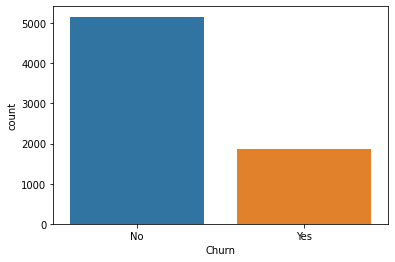

In [121]:
# CODE HERE
sns.countplot(data=df, x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

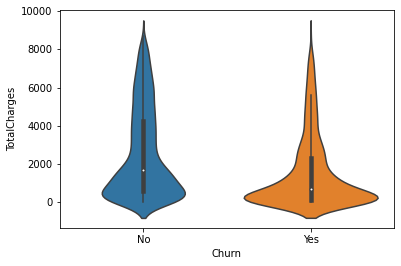

In [122]:
# CODE HERE
sns.violinplot(data=df,x='Churn', y='TotalCharges')

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

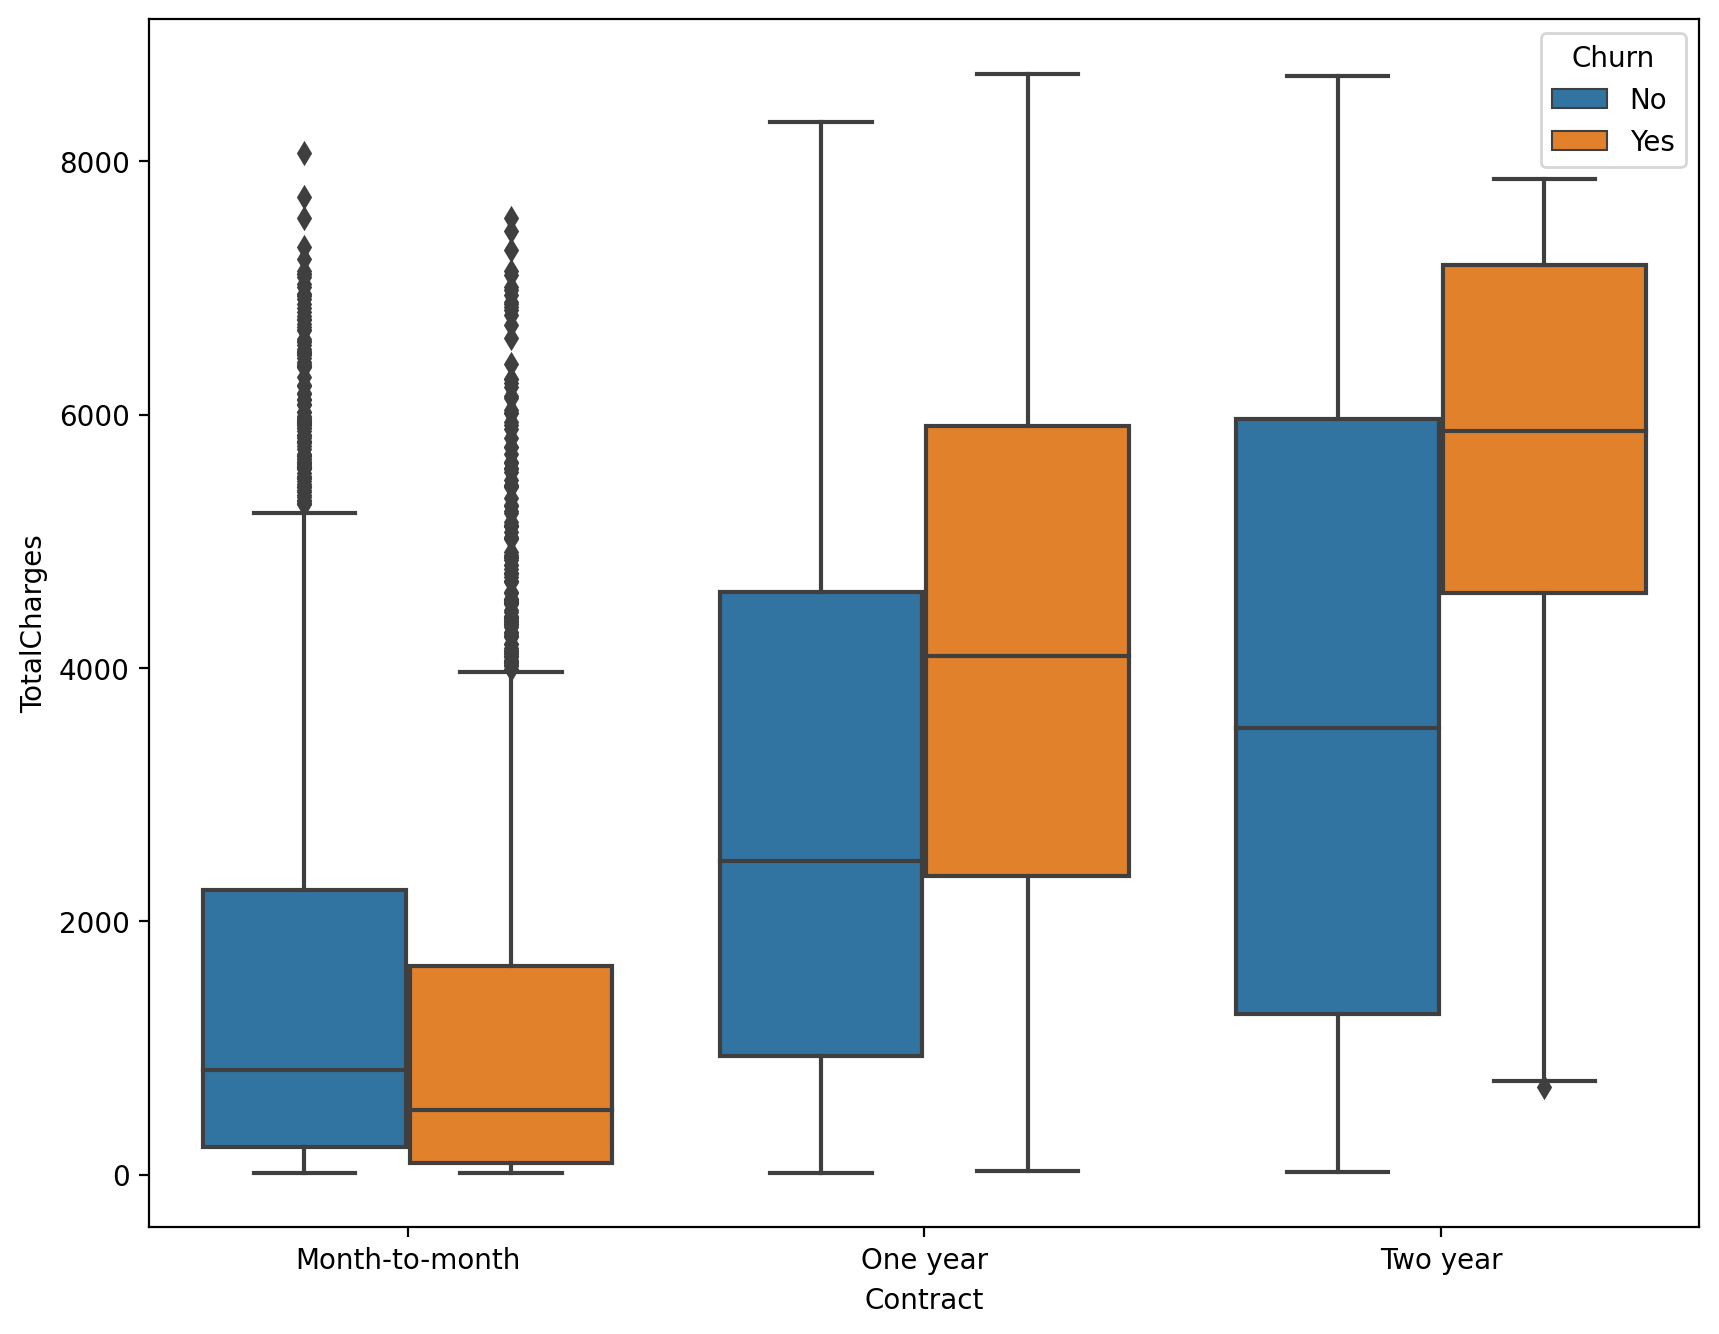

In [123]:
#CODE HERE
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df, x='Contract',y='TotalCharges', hue='Churn')

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [124]:
#CODE HERE
df_dummies = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
df_dummies = pd.get_dummies(df_dummies,drop_first=True)
df_dummies


#Pro ML modely je nutne udelat drop_first=True, ale pro EDA to nutne neni


SeniorCitizen 
 gender_Male 
 Partner_Yes 
 Dependents_Yes 
 PhoneService_Yes 
 MultipleLines_No phone service 
 MultipleLines_Yes 
 OnlineSecurity_No internet service 
 OnlineSecurity_Yes 
 OnlineBackup_No internet service 
 ... 
 StreamingTV_Yes 
 StreamingMovies_No internet service 
 StreamingMovies_Yes 
 Contract_One year 
 Contract_Two year 
 PaperlessBilling_Yes 
 PaymentMethod_Credit card (automatic) 
 PaymentMethod_Electronic check 
 PaymentMethod_Mailed check 
 Churn_Yes 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 7027 
 0 
 1 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 ... 
 1 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 
 
 7028 
 0 
 0 
 1 
 1 
 1 
 0 
 1 
 0 
 0 
 0 
 ... 
 1 
 0 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 7029 
 0 
 0 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7030 
 1 
 1 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 1 
 
 
 7031 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 ... 
 1 
 0 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 
 
 
 7032 rows × 28 columns

In [125]:
correlation = df_dummies.corr()['Churn_Yes']
correlation = correlation.drop('Churn_Yes', axis=0).sort_values()
correlation

Contract_Two year -0.301552
TechSupport_No internet service -0.227578
StreamingMovies_No internet service -0.227578
OnlineSecurity_No internet service -0.227578
OnlineBackup_No internet service -0.227578
StreamingTV_No internet service -0.227578
DeviceProtection_No internet service -0.227578
InternetService_No -0.227578
Contract_One year -0.178225
OnlineSecurity_Yes -0.171270
TechSupport_Yes -0.164716
Dependents_Yes -0.163128
Partner_Yes -0.149982
PaymentMethod_Credit card (automatic) -0.134687
PaymentMethod_Mailed check -0.090773
OnlineBackup_Yes -0.082307
DeviceProtection_Yes -0.066193
MultipleLines_No phone service -0.011691
gender_Male -0.008545
PhoneService_Yes 0.011691
MultipleLines_Yes 0.040033
StreamingMovies_Yes 0.060860
StreamingTV_Yes 0.063254
SeniorCitizen 0.150541
PaperlessBilling_Yes 0.191454
PaymentMethod_Electronic check 0.301455
InternetService_Fiber optic 0.307463
Name: Churn_Yes, dtype: float64

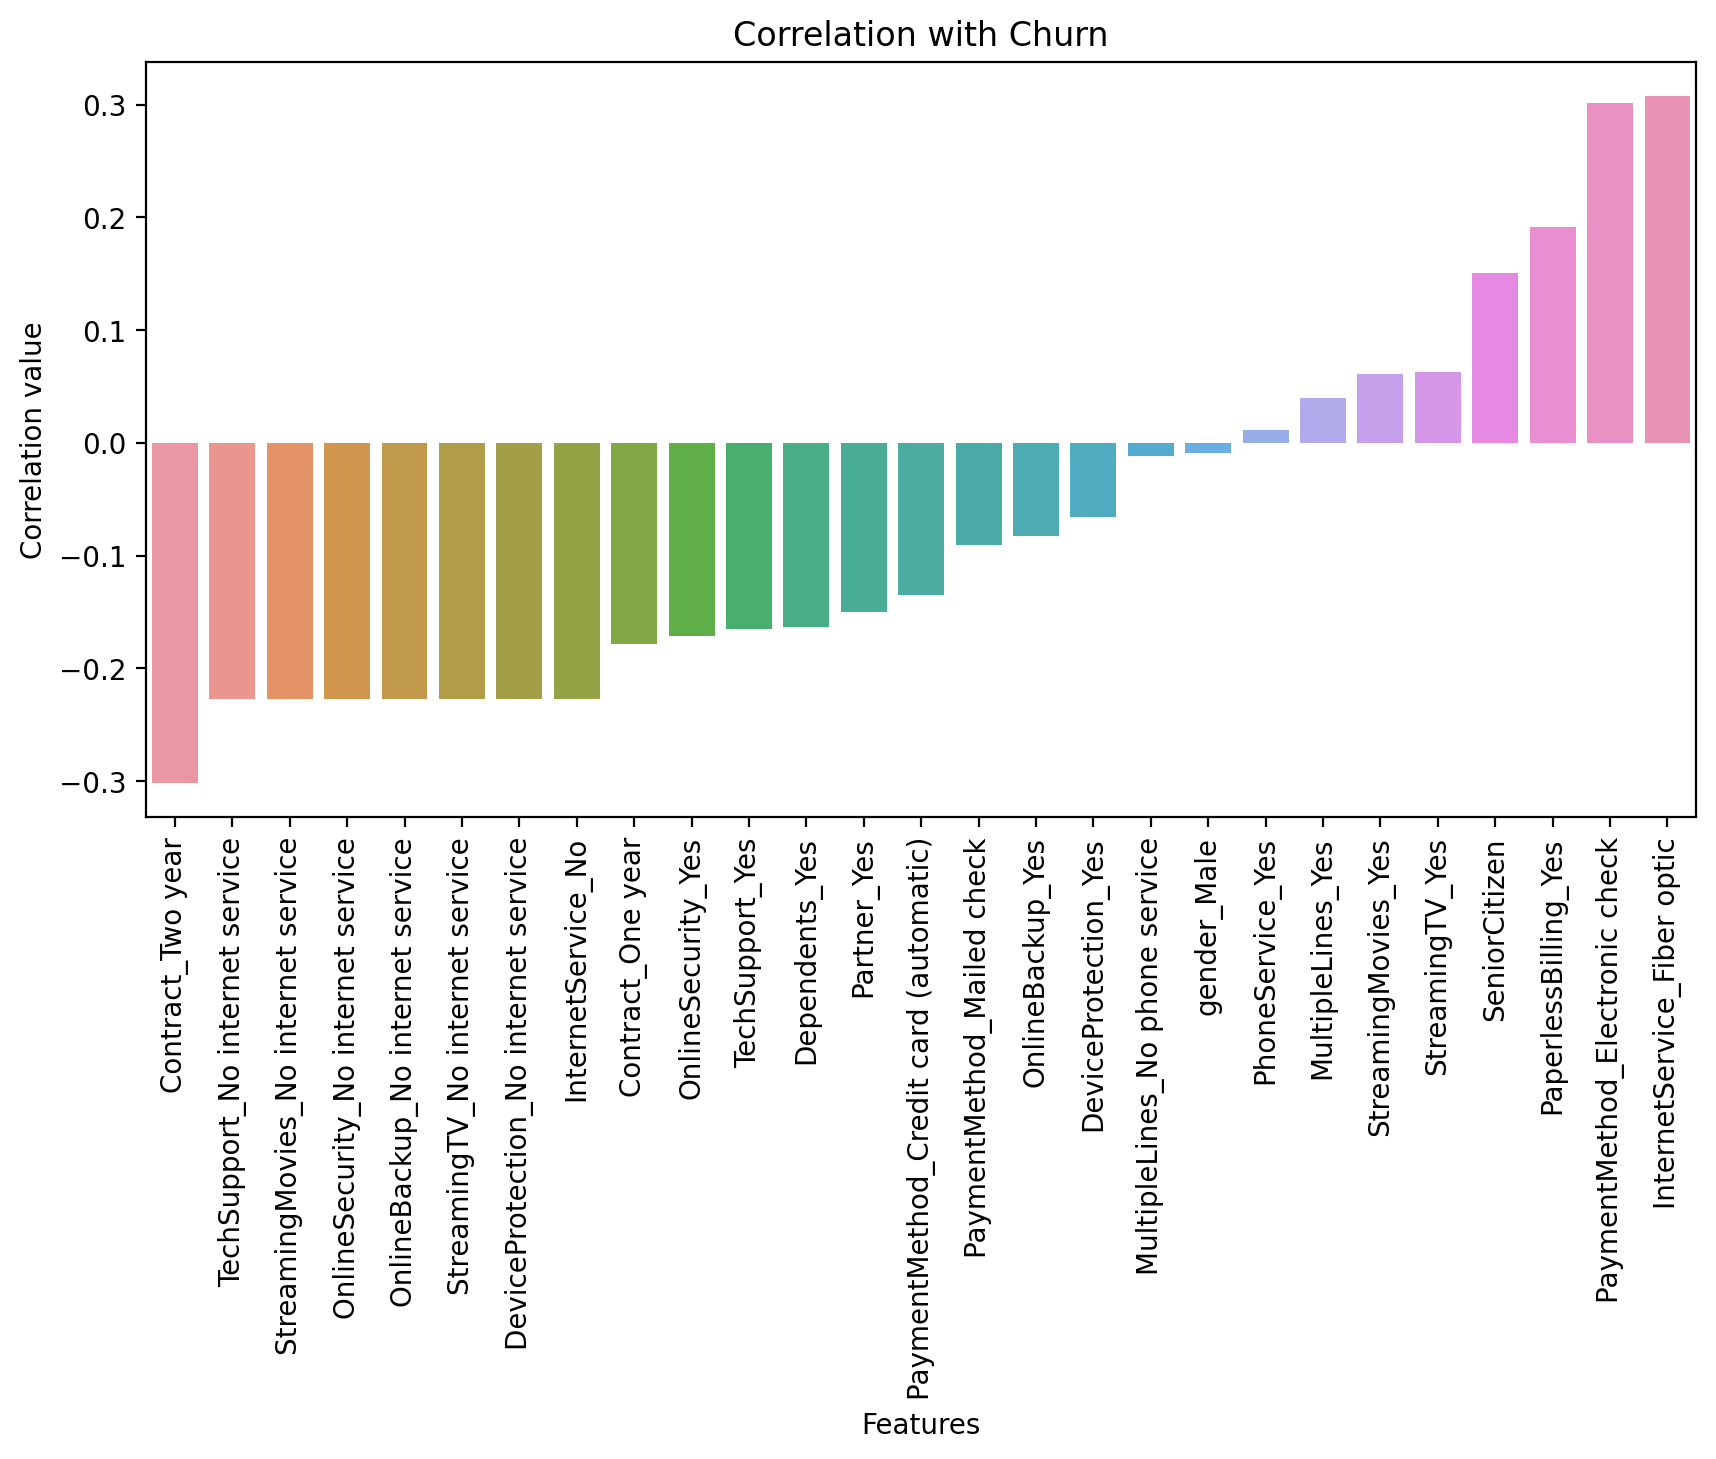

In [126]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation with Churn')    # title for the chart
plt.xlabel('Features')                 # label for x-axis
plt.ylabel('Correlation value');       # label for y-axis

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [127]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

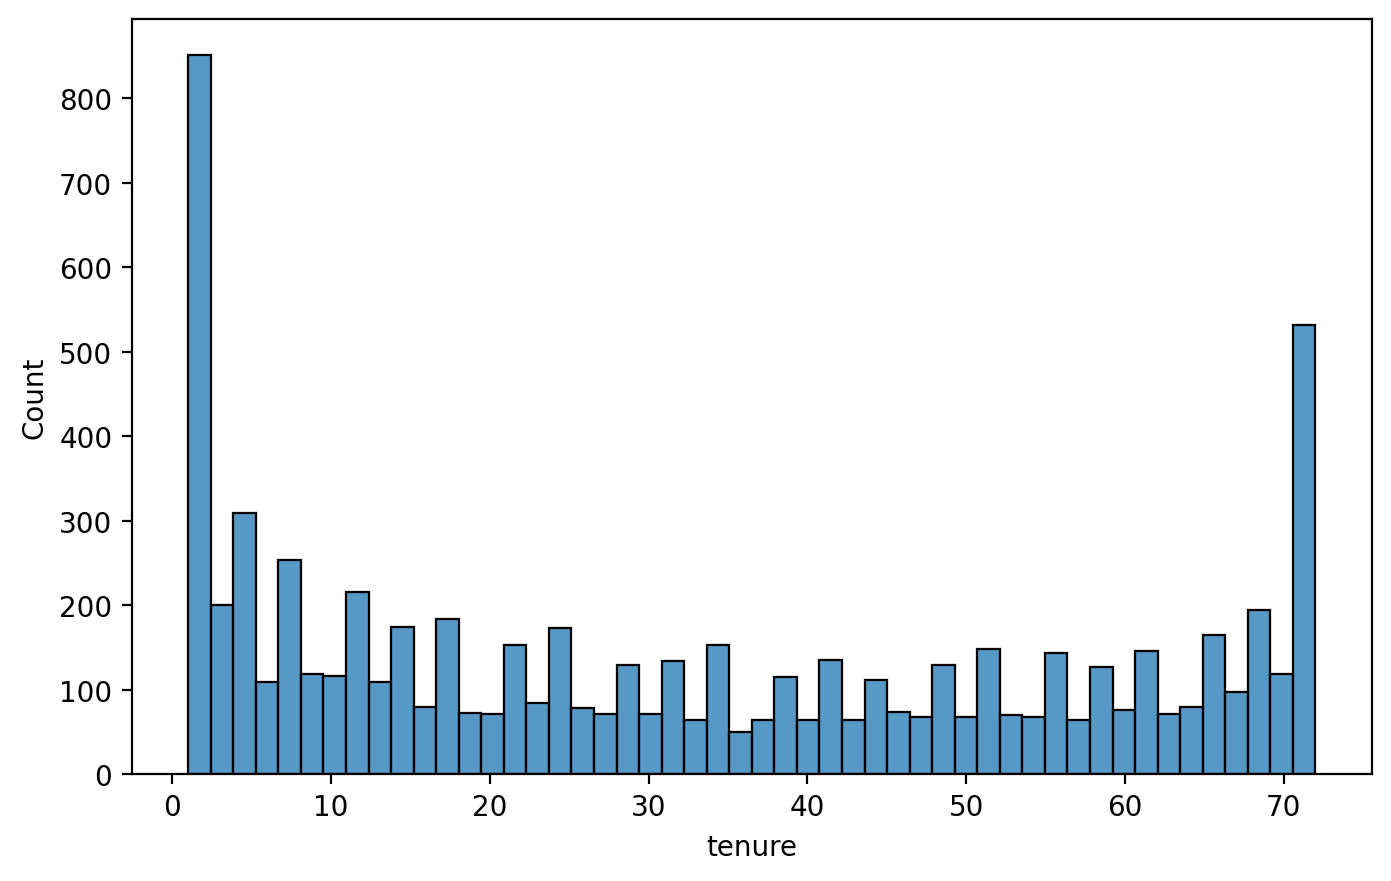

In [128]:
plt.figure(figsize=(8,5),dpi=200)
sns.histplot(data=df, x='tenure',bins=50)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

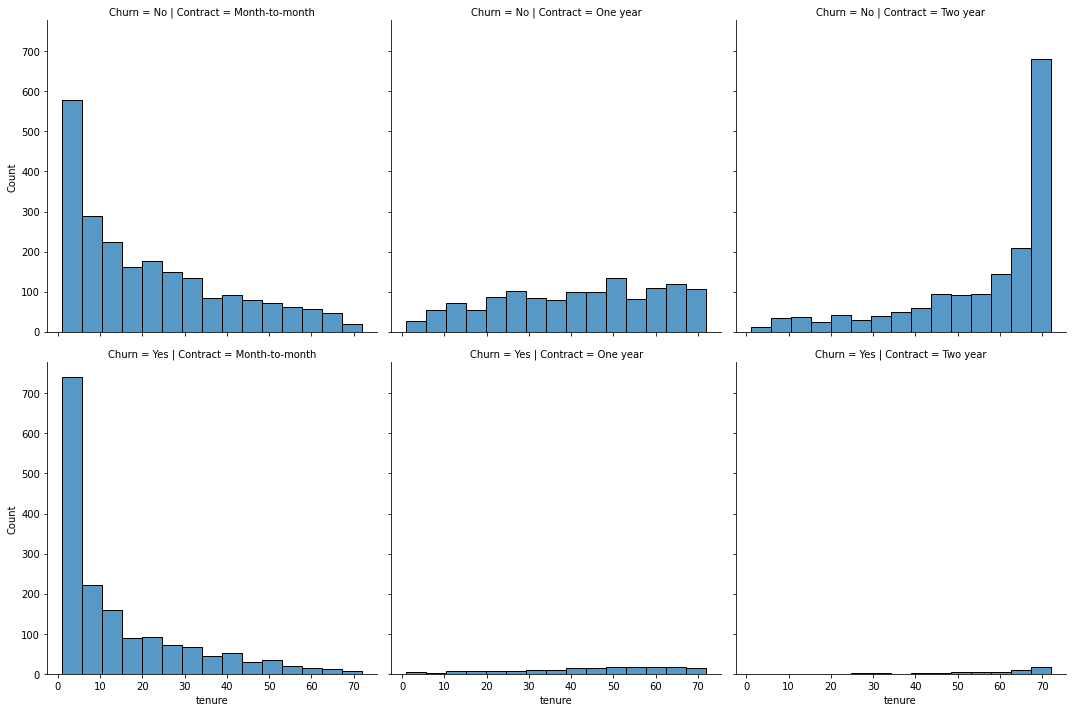

In [129]:
sns.displot(data=df, x="tenure", col="Contract",row='Churn');

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

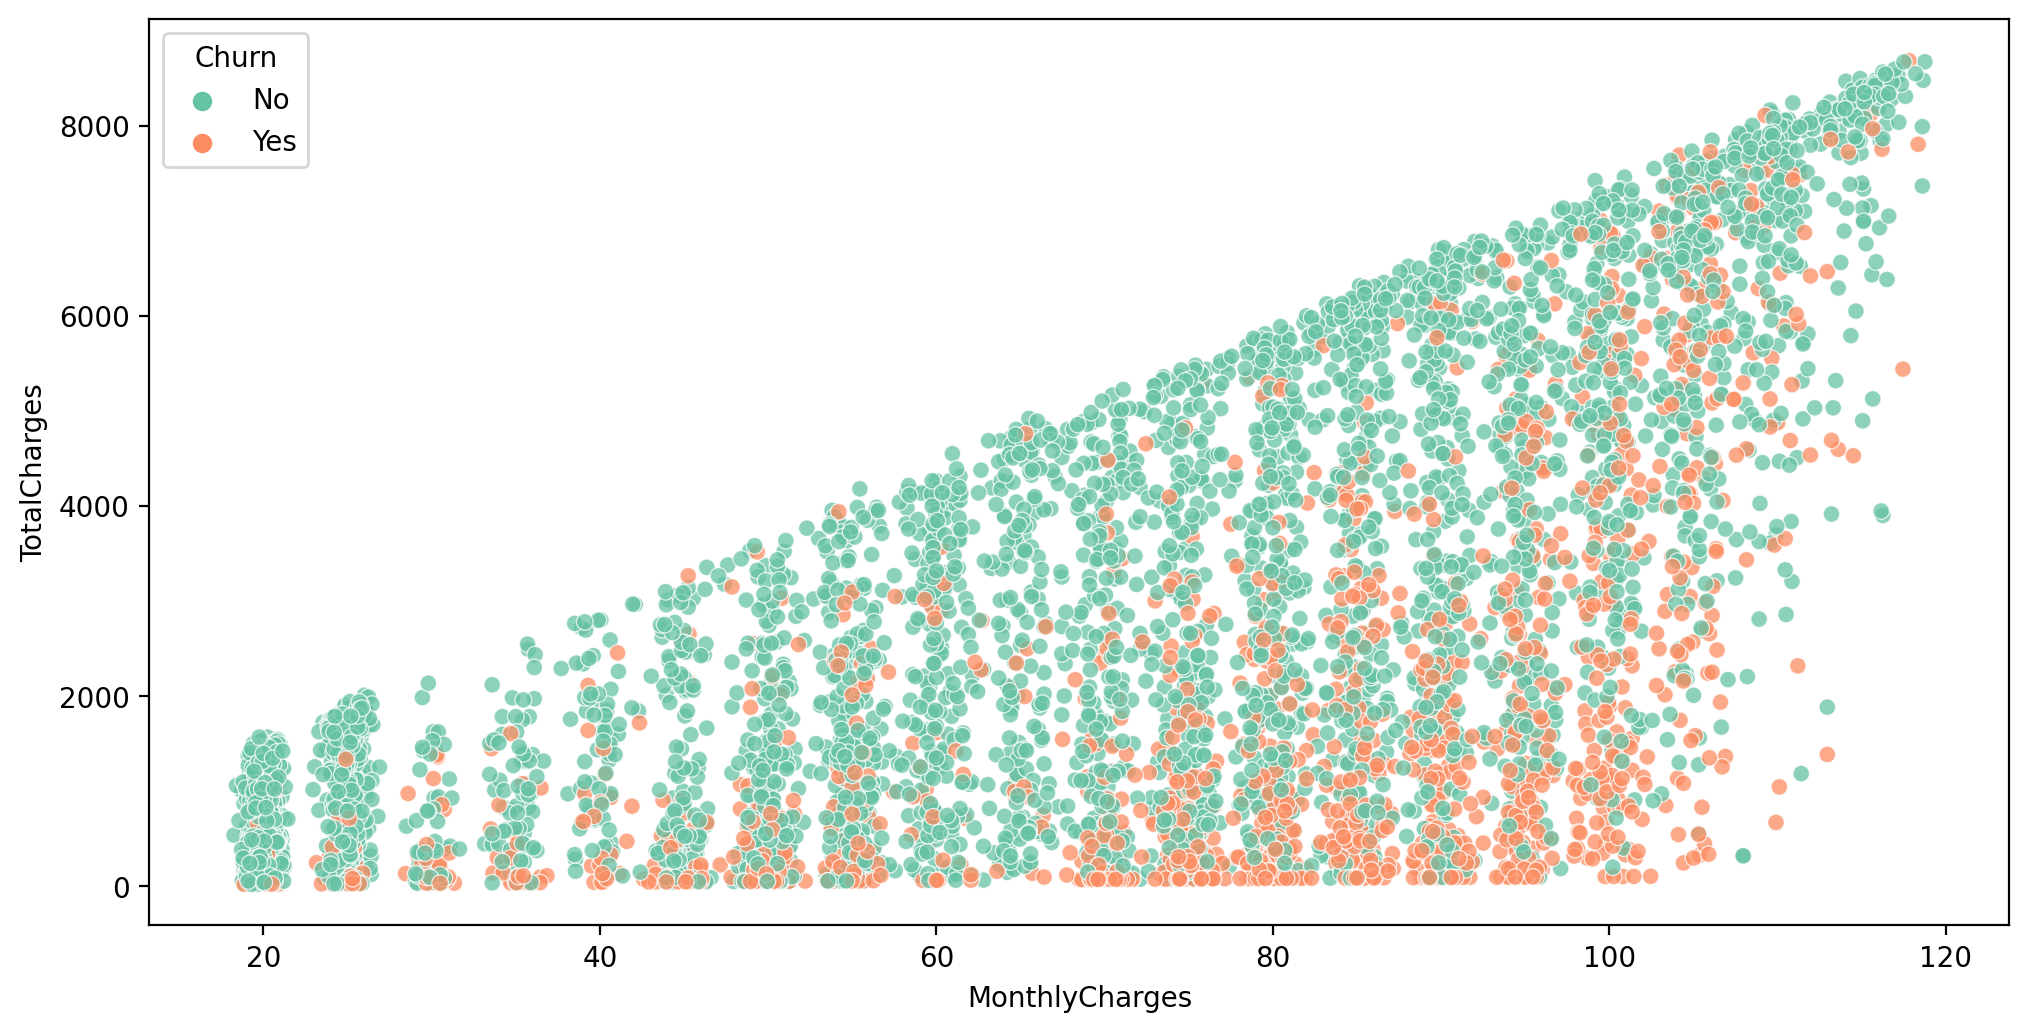

In [130]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2', alpha=0.75)

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [131]:
# name an index. It must be called 'tenure' 
cohort_df = df.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').sum() / x.shape[0] * 100).rename_axis('tenure')

cohort_df

tenure
1 61.990212
2 51.680672
3 47.000000
4 47.159091
5 48.120301
 ... 
68 9.000000
69 8.421053
70 9.243697
71 3.529412
72 1.657459
Name: Churn, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

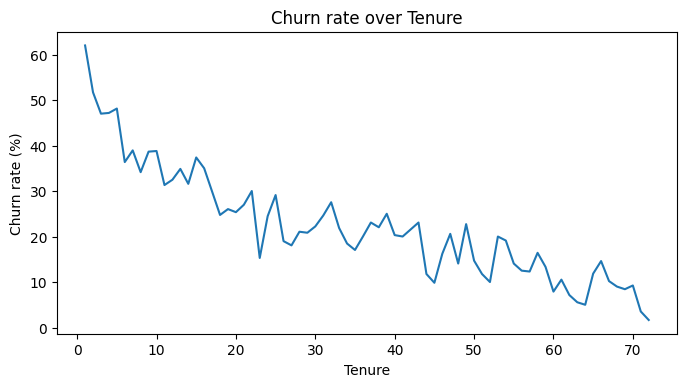

In [132]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(cohort_df.index, cohort_df.values)
plt.xlabel('Tenure') 
plt.ylabel('Churn rate (%)')
plt.title('Churn rate over Tenure');

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [133]:
def assign_group(x):
    if x <= 12:
        return '0-12 Months'
    elif x <= 24:
        return '12-24 Months'
    elif x <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

df['Tenure Cohort'] = df['tenure'].apply(assign_group)
df

customerID 
 gender 
 SeniorCitizen 
 Partner 
 Dependents 
 tenure 
 PhoneService 
 MultipleLines 
 InternetService 
 OnlineSecurity 
 ... 
 TechSupport 
 StreamingTV 
 StreamingMovies 
 Contract 
 PaperlessBilling 
 PaymentMethod 
 MonthlyCharges 
 TotalCharges 
 Churn 
 Tenure Cohort 
 
 
 
 
 0 
 7590-VHVEG 
 Female 
 0 
 Yes 
 No 
 1 
 No 
 No phone service 
 DSL 
 No 
 ... 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Electronic check 
 29.85 
 29.85 
 No 
 0-12 Months 
 
 
 1 
 5575-GNVDE 
 Male 
 0 
 No 
 No 
 34 
 Yes 
 No 
 DSL 
 Yes 
 ... 
 No 
 No 
 No 
 One year 
 No 
 Mailed check 
 56.95 
 1889.50 
 No 
 24-48 Months 
 
 
 2 
 3668-QPYBK 
 Male 
 0 
 No 
 No 
 2 
 Yes 
 No 
 DSL 
 Yes 
 ... 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Mailed check 
 53.85 
 108.15 
 Yes 
 0-12 Months 
 
 
 3 
 7795-CFOCW 
 Male 
 0 
 No 
 No 
 45 
 No 
 No phone service 
 DSL 
 Yes 
 ... 
 Yes 
 No 
 No 
 One year 
 No 
 Bank transfer (automatic) 
 42.30 
 1840.75 
 No 
 24-48 Months 
 
 
 4 
 9237-HQITU 
 Female 
 0 
 No 
 No 
 2 
 Yes 
 No 
 Fiber optic 
 No 
 ... 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Electronic check 
 70.70 
 151.65 
 Yes 
 0-12 Months 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 7027 
 6840-RESVB 
 Male 
 0 
 Yes 
 Yes 
 24 
 Yes 
 Yes 
 DSL 
 Yes 
 ... 
 Yes 
 Yes 
 Yes 
 One year 
 Yes 
 Mailed check 
 84.80 
 1990.50 
 No 
 12-24 Months 
 
 
 7028 
 2234-XADUH 
 Female 
 0 
 Yes 
 Yes 
 72 
 Yes 
 Yes 
 Fiber optic 
 No 
 ... 
 No 
 Yes 
 Yes 
 One year 
 Yes 
 Credit card (automatic) 
 103.20 
 7362.90 
 No 
 Over 48 Months 
 
 
 7029 
 4801-JZAZL 
 Female 
 0 
 Yes 
 Yes 
 11 
 No 
 No phone service 
 DSL 
 Yes 
 ... 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Electronic check 
 29.60 
 346.45 
 No 
 0-12 Months 
 
 
 7030 
 8361-LTMKD 
 Male 
 1 
 Yes 
 No 
 4 
 Yes 
 Yes 
 Fiber optic 
 No 
 ... 
 No 
 No 
 No 
 Month-to-month 
 Yes 
 Mailed check 
 74.40 
 306.60 
 Yes 
 0-12 Months 
 
 
 7031 
 3186-AJIEK 
 Male 
 0 
 No 
 No 
 66 
 Yes 
 No 
 Fiber optic 
 Yes 
 ... 
 Yes 
 Yes 
 Yes 
 Two year 
 Yes 
 Bank transfer (automatic) 
 105.65 
 6844.50 
 No 
 Over 48 Months 
 
 
 
 7032 rows × 22 columns

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

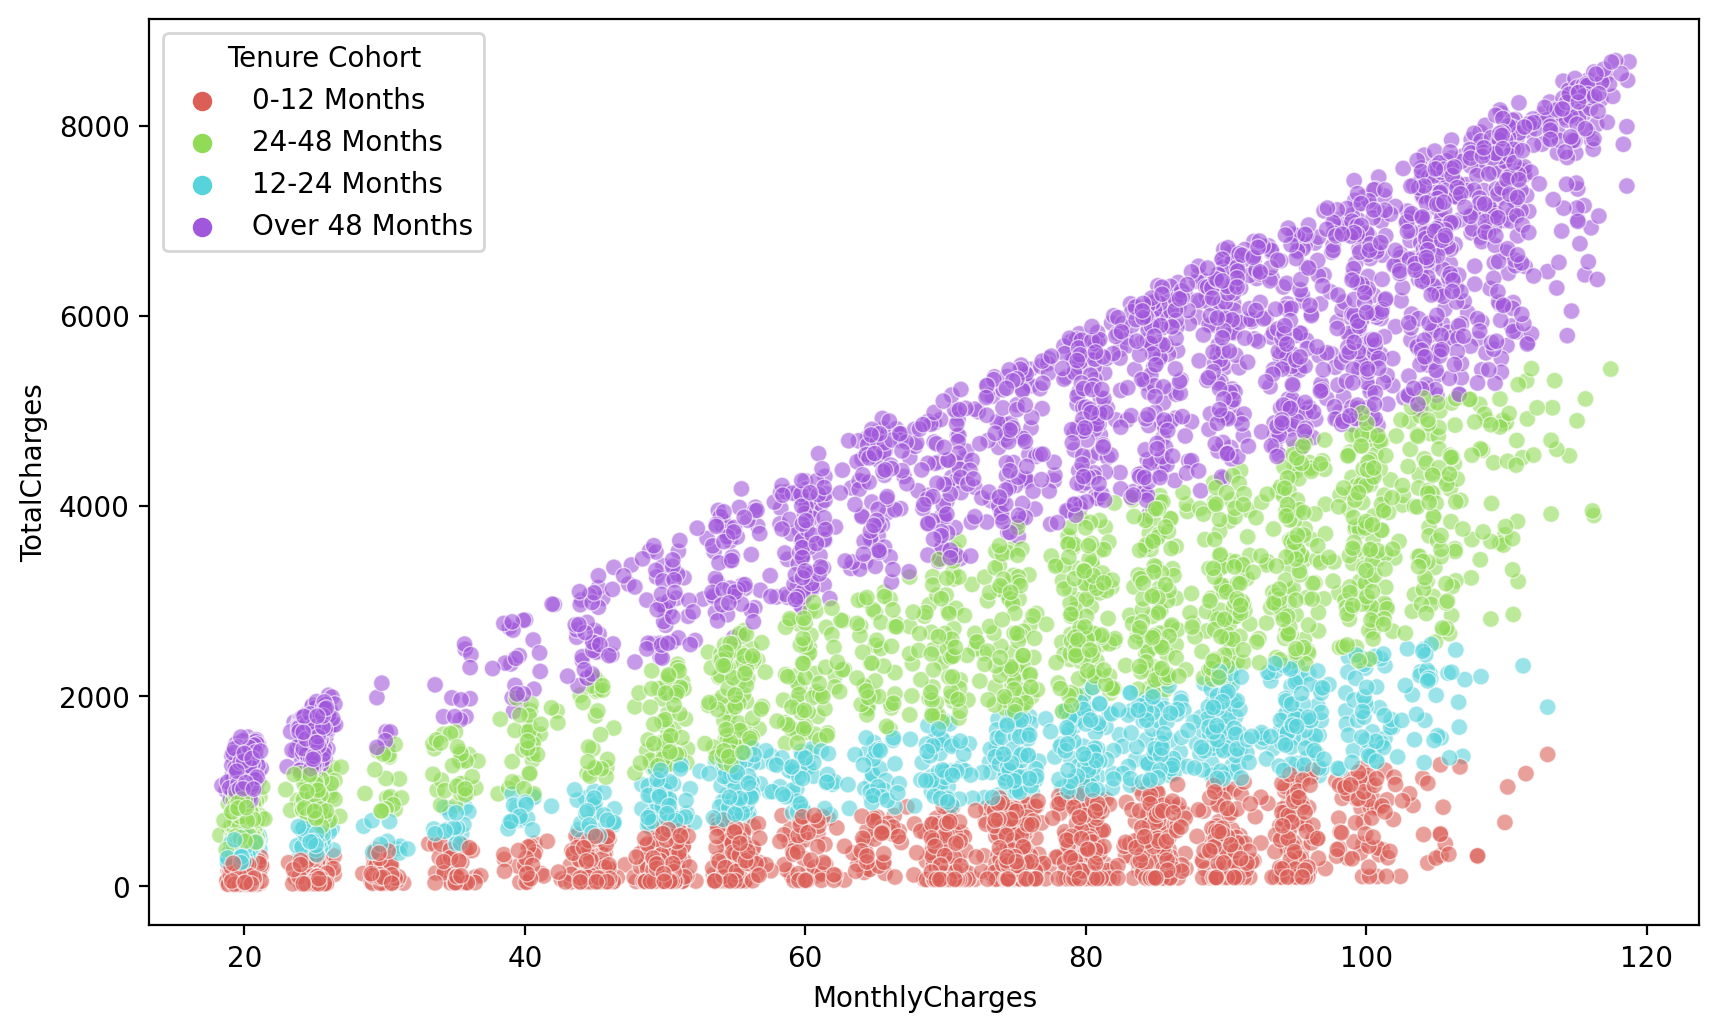

In [134]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.6, palette='hls')

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

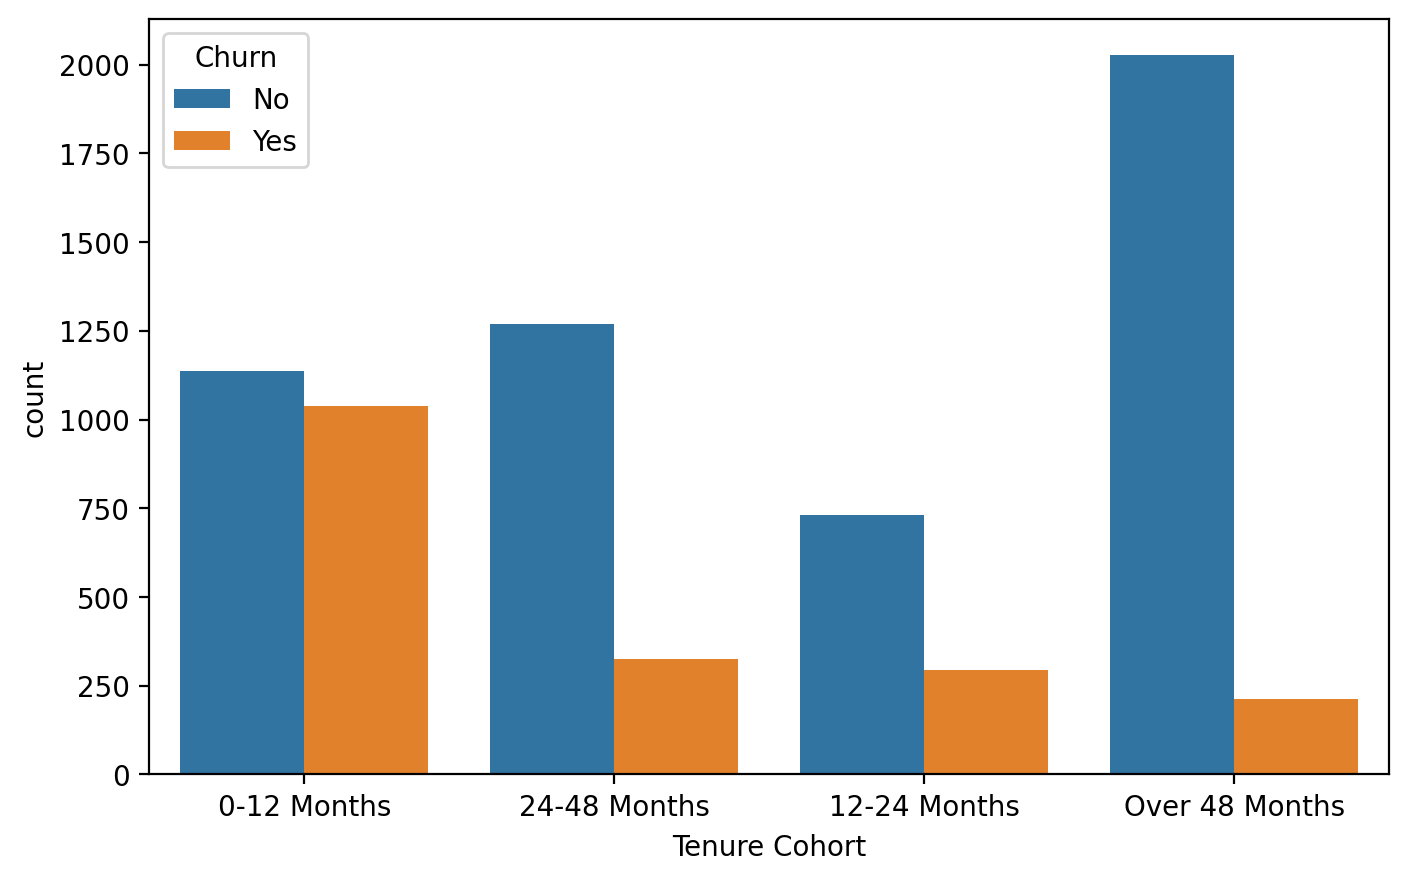

In [135]:
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

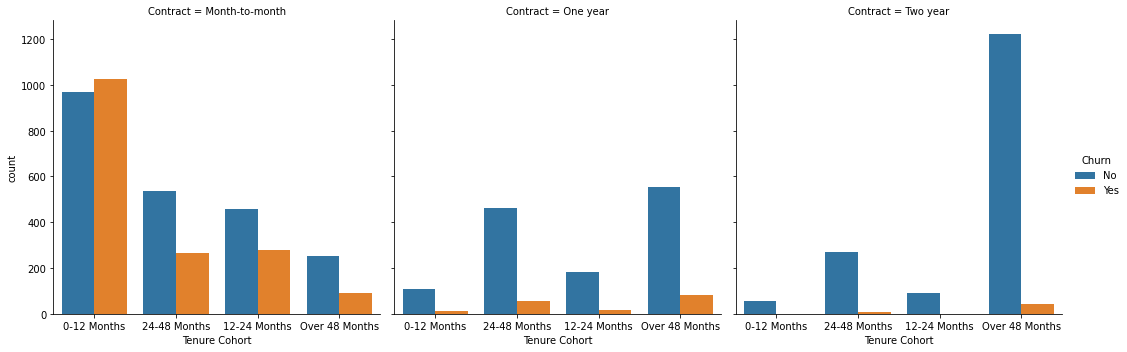

In [136]:
sns.catplot(data=df, x="Tenure Cohort", col="Contract",hue='Churn', kind="count");

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [137]:
X = df.drop(['customerID','Churn'], axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X
# Adaboost may be the only method that requires labels as binary vector, all other  tree models and gradientboost should work with categorical labels directly.

SeniorCitizen 
 tenure 
 MonthlyCharges 
 TotalCharges 
 gender_Male 
 Partner_Yes 
 Dependents_Yes 
 PhoneService_Yes 
 MultipleLines_No phone service 
 MultipleLines_Yes 
 ... 
 StreamingMovies_Yes 
 Contract_One year 
 Contract_Two year 
 PaperlessBilling_Yes 
 PaymentMethod_Credit card (automatic) 
 PaymentMethod_Electronic check 
 PaymentMethod_Mailed check 
 Tenure Cohort_12-24 Months 
 Tenure Cohort_24-48 Months 
 Tenure Cohort_Over 48 Months 
 
 
 
 
 0 
 0 
 1 
 29.85 
 29.85 
 0 
 1 
 0 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 34 
 56.95 
 1889.50 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 
 
 2 
 0 
 2 
 53.85 
 108.15 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 3 
 0 
 45 
 42.30 
 1840.75 
 1 
 0 
 0 
 0 
 1 
 0 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4 
 0 
 2 
 70.70 
 151.65 
 0 
 0 
 0 
 1 
 0 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 7027 
 0 
 24 
 84.80 
 1990.50 
 1 
 1 
 1 
 1 
 0 
 1 
 ... 
 1 
 1 
 0 
 1 
 0 
 0 
 1 
 1 
 0 
 0 
 
 
 7028 
 0 
 72 
 103.20 
 7362.90 
 0 
 1 
 1 
 1 
 0 
 1 
 ... 
 1 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 
 
 7029 
 0 
 11 
 29.60 
 346.45 
 0 
 1 
 1 
 0 
 1 
 0 
 ... 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 
 
 7030 
 1 
 4 
 74.40 
 306.60 
 1 
 1 
 0 
 1 
 0 
 1 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 7031 
 0 
 66 
 105.65 
 6844.50 
 1 
 0 
 0 
 1 
 0 
 0 
 ... 
 1 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 
 7032 rows × 33 columns

In [138]:
y = df['Churn']
y = pd.get_dummies(data=y, drop_first=True)
y = np.ravel(y) # To prevent the DataConversionWarning
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini','entropy', 'log_loss'],'min_samples_leaf':[1,2,3,4], 'max_depth': [2, 4, 5], 'max_features': ['sqrt', 'log2', None], 'splitter':['best', 'random']}


# Create an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=101)

# Create an instance of GridSearchCV with the estimator and parameter grid
gscv = GridSearchCV(tree, param_grid, cv=4,  scoring = 'roc_auc')

# Fit the GridSearchCV on the training data
gscv.fit(X_train, y_train)

# Print the best parameters and score
print(gscv.best_score_)
print(gscv.best_estimator_)

0.8305962517193858
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=101)


In [141]:
from sklearn.metrics import classification_report


y_pred = gscv.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       557
           1       0.47      0.58      0.52       147

    accuracy                           0.78       704
   macro avg       0.68      0.70      0.69       704
weighted avg       0.80      0.78      0.78       704



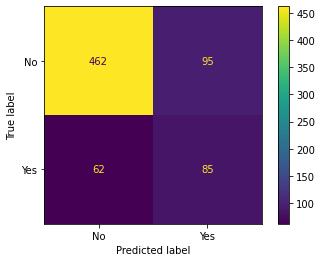

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gscv.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'])

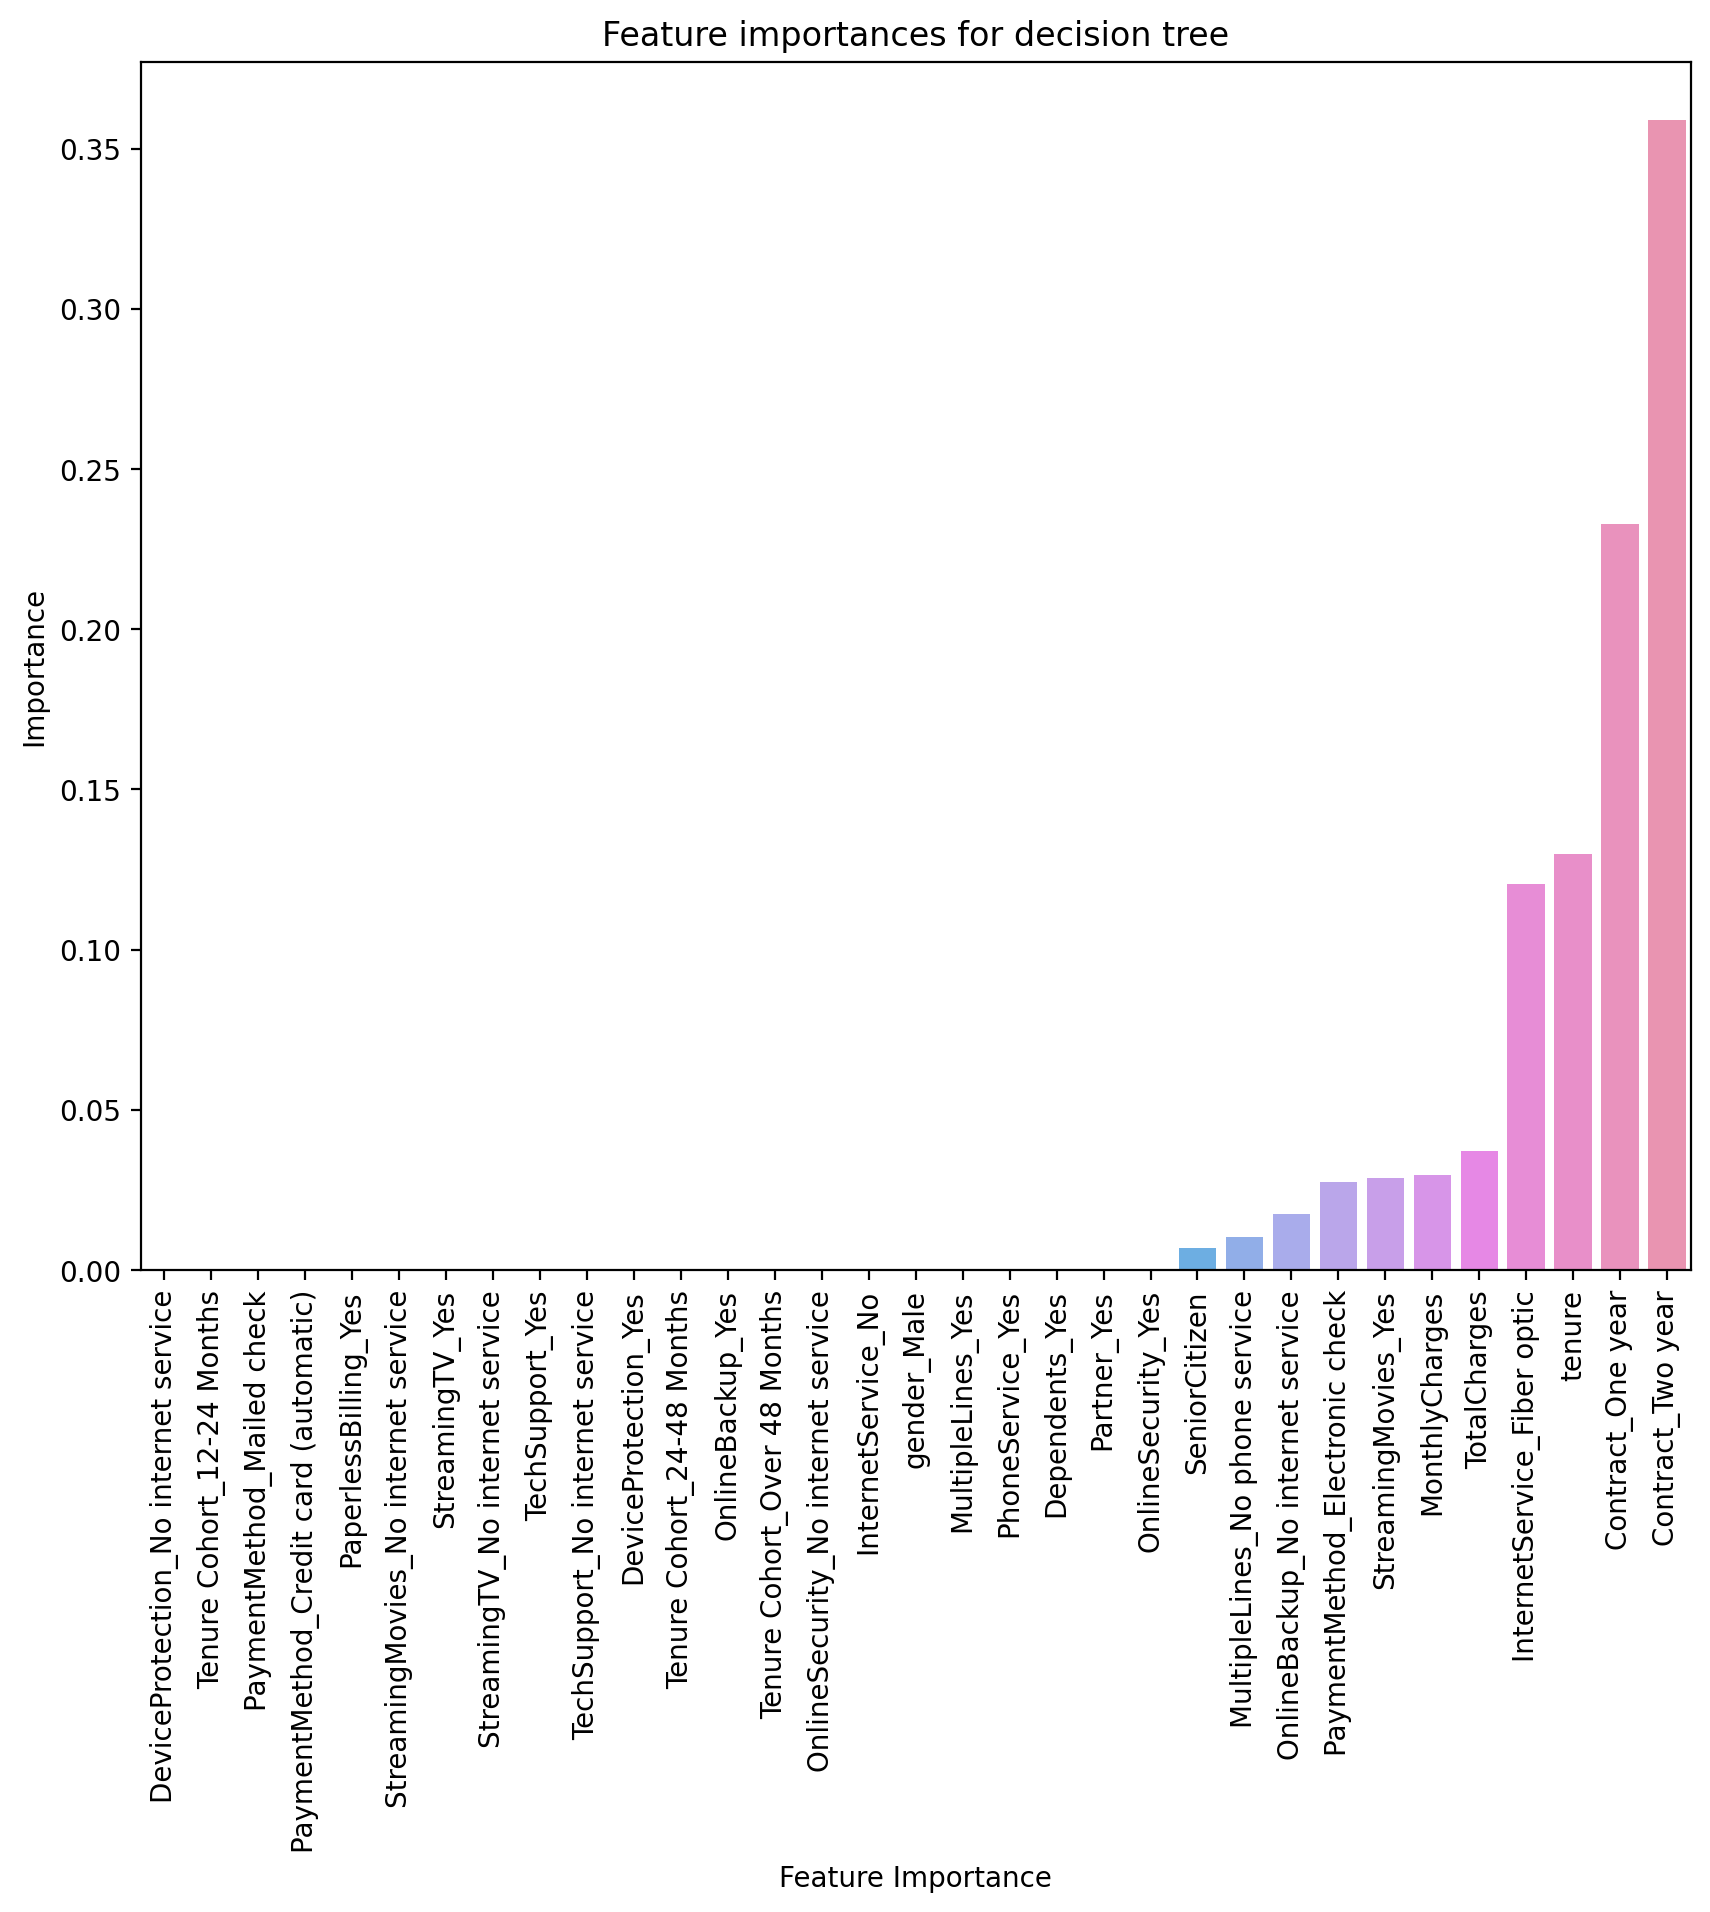

In [143]:
# now set xticks to 90 degrees 
importances = gscv.best_estimator_.feature_importances_

# Get the feature names from the data
feature_names = X_train.columns

# Create a DataFrame with feature names and importances
feat_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"])

# Sort the DataFrame by importances in ascending order
feat_importances = feat_importances.sort_values(by="Importance")

# Plot the feature importances as a horizontal bar chart using seaborn
plt.figure(figsize=(10,8),dpi=200)
sns.barplot(x=feat_importances.index, y='Importance', data=feat_importances)
plt.xlabel("Feature Importance")
plt.title("Feature importances for decision tree")
plt.xticks(rotation=90);

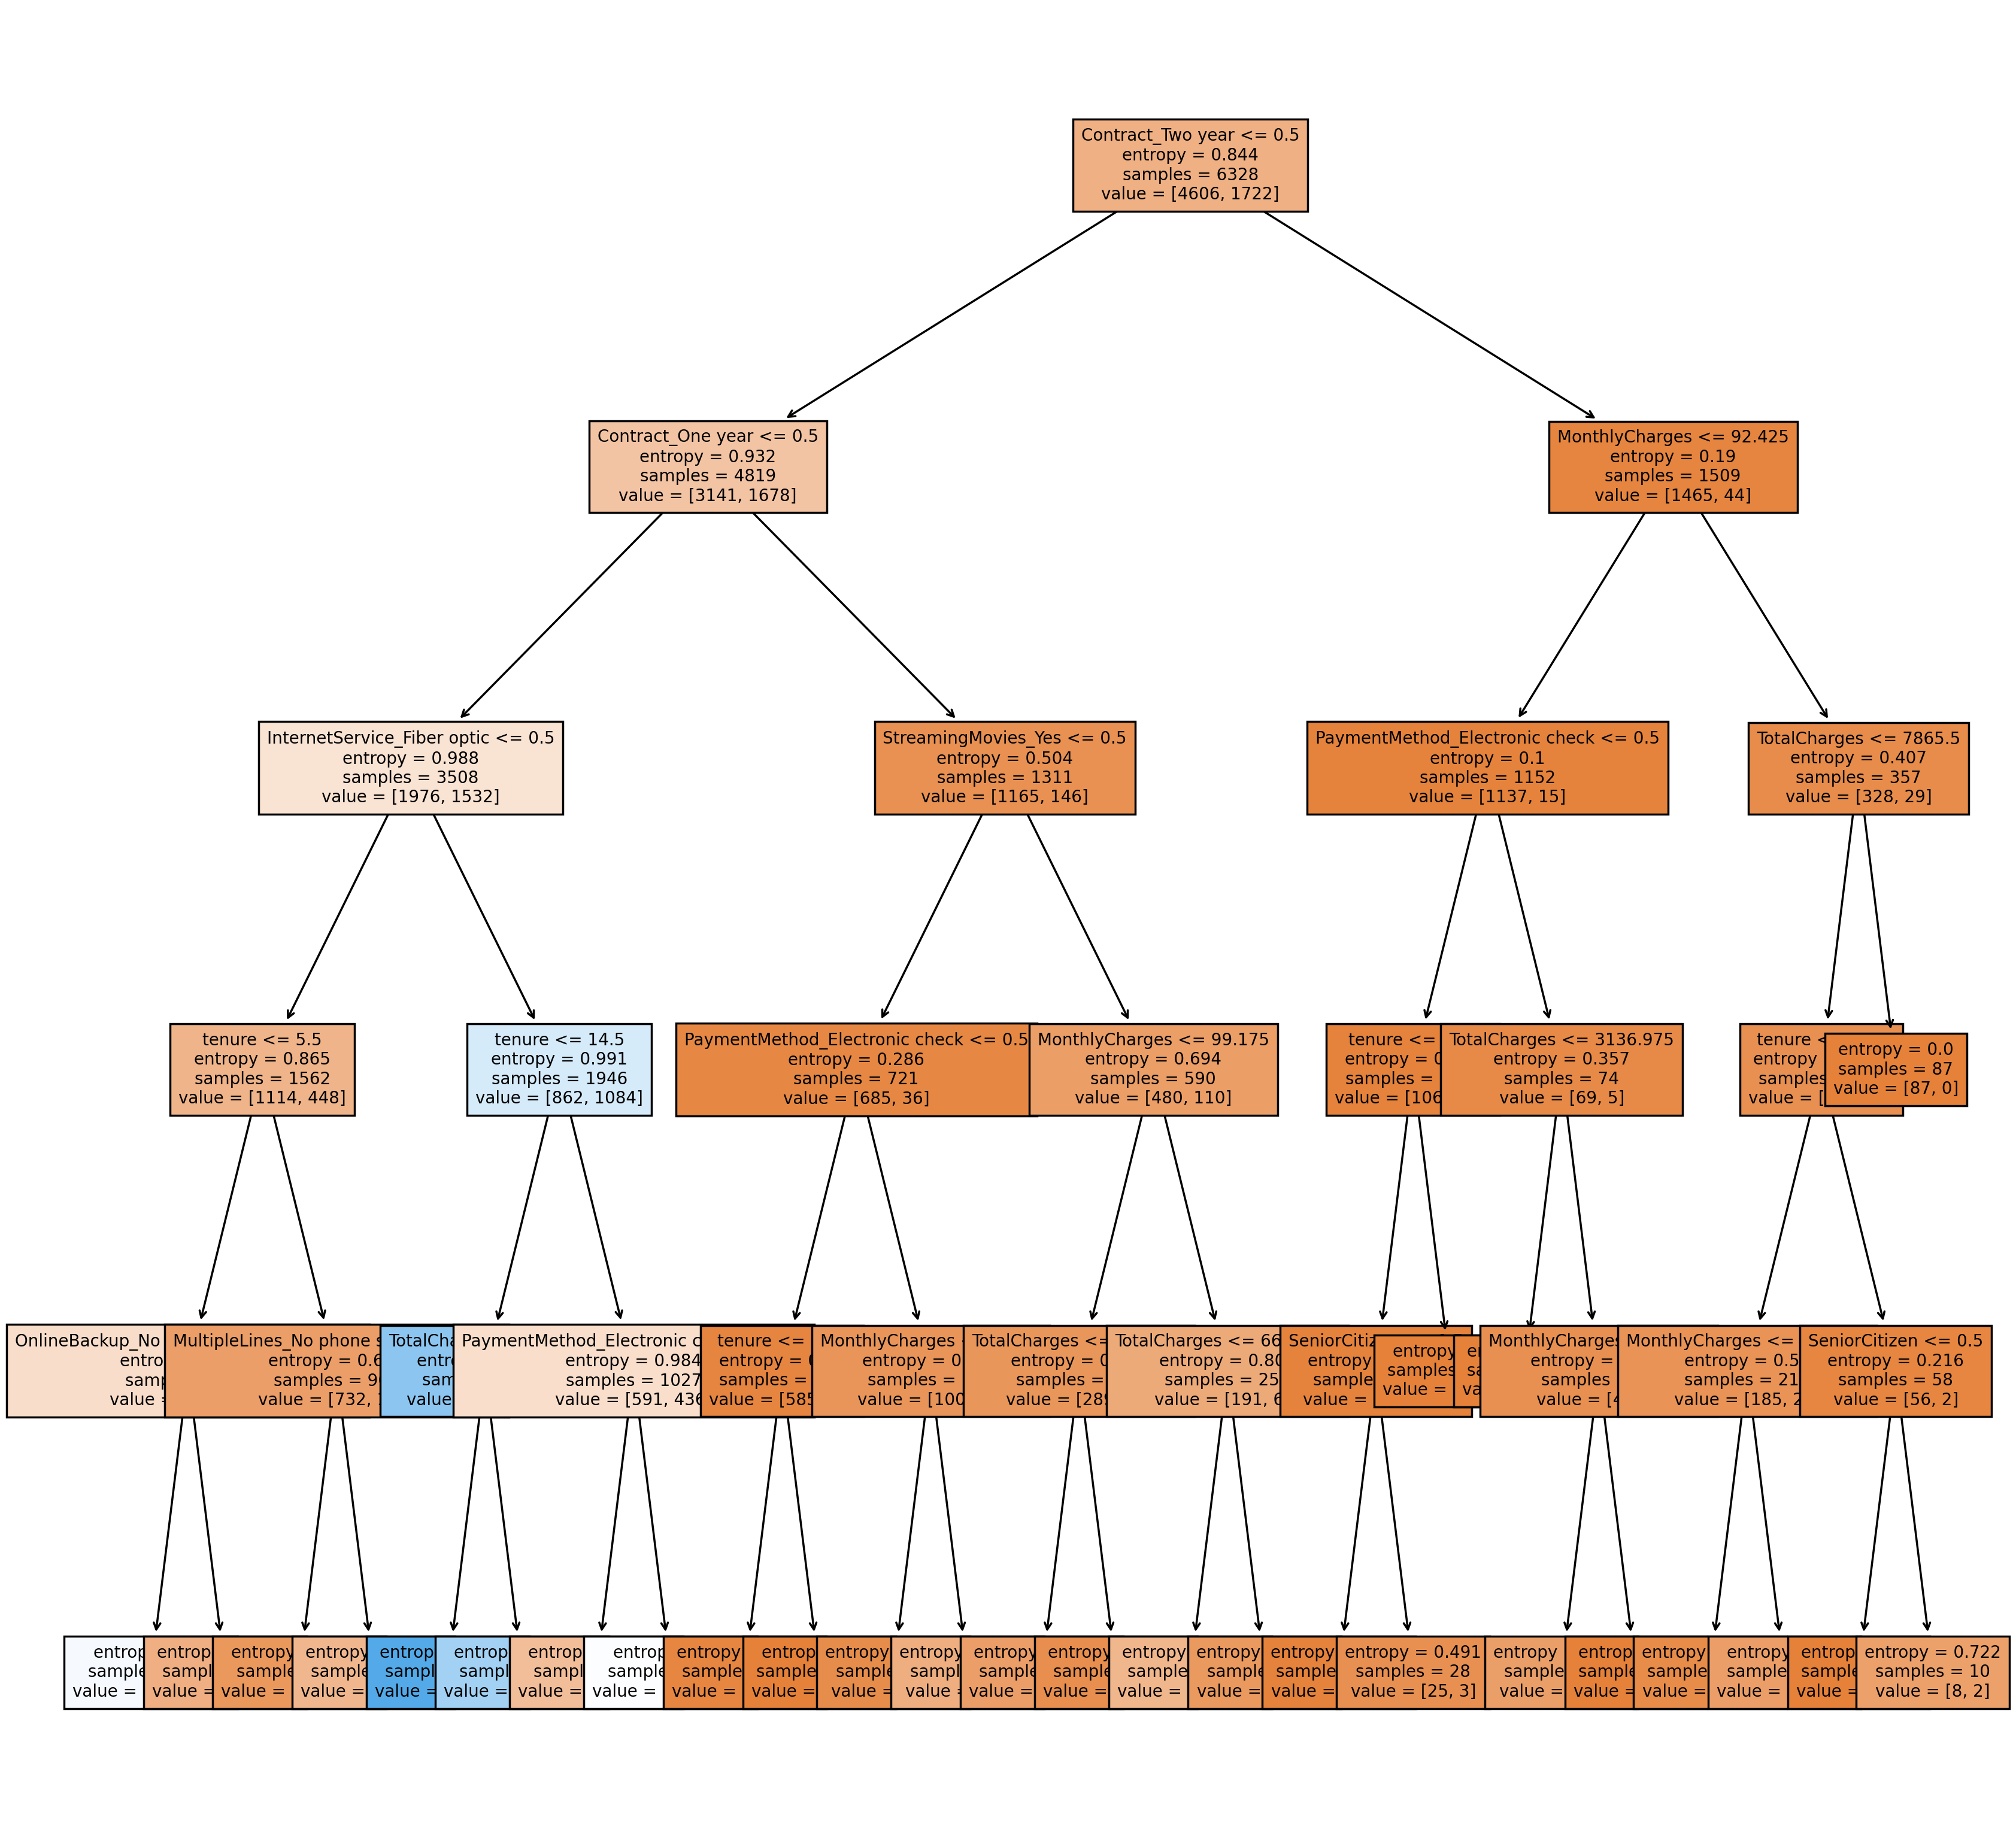

In [144]:
from sklearn import tree
plt.figure(figsize=(16,16),dpi=250)
tree_draw = tree.plot_tree(gscv.best_estimator_, 
                feature_names=feature_names,
                filled=True,
                fontsize=8)

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [145]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [10, 20], # Number of trees in the forest
    'max_depth': [2, 5, 10], # Maximum depth of each tree
    'max_features': [None, 'sqrt', 'log2'], # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'], # Function to measure the quality of a split
    'bootstrap': [True], # Whether to use bootstrap samples or not
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=101)

# Create a grid search object with 5-fold cross-validation
gscv_rfc = GridSearchCV(rfc, param_grid_rf, cv=4, scoring='roc_auc', n_jobs=-1)

# Fit the grid search object to the training data
gscv_rfc.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', gscv_rfc.best_params_)
print('Best score:', gscv_rfc.best_score_)
print(gscv_rfc.best_estimator_)

Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'n_estimators': 20}
Best score: 0.8412952325915353
RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       n_estimators=20, random_state=101)


In [146]:
# Predict the labels of the test data using the best estimator
y_pred_rfc = gscv_rfc.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.58      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



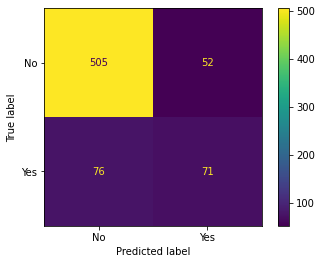

In [147]:
ConfusionMatrixDisplay.from_estimator(gscv_rfc.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'])

## Adaptive Boosted Tree

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [148]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=101)
param_grid_ada = {'n_estimators':[1,10,20,50,100],'learning_rate':[0.01,0.1,0.5,1.0]}
gscv_ada = GridSearchCV(ada_boost, param_grid_ada, cv=4, scoring='roc_auc')

# Fit the grid search object to the training data
gscv_ada.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', gscv_ada.best_params_)
print('Best score:', gscv_ada.best_score_)
print(gscv_ada.best_estimator_)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best score: 0.8469711033092153
AdaBoostClassifier(learning_rate=0.5, random_state=101)


In [149]:
y_pred_ada = gscv_ada.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       557
           1       0.61      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



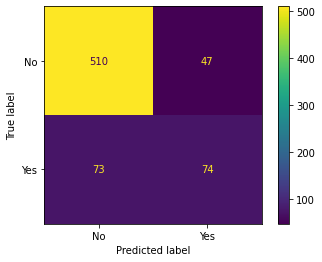

In [150]:
ConfusionMatrixDisplay.from_estimator(gscv_ada.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'])

## Gradient Boosted Tree

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state=101)
param_grid_grad = {'n_estimators':[1,10,20,50,100],
                   'learning_rate':[0.01,0.1,0.5,1.0],
                   'max_depth':[3,6,9],
                   'min_samples_split':[2,4,6]
}
gscv_grad = GridSearchCV(grad_boost, param_grid_grad, cv=4, scoring='roc_auc')

# Fit the grid search object to the training data
gscv_grad.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', gscv_grad.best_params_)
print('Best score:', gscv_grad.best_score_)
print(gscv_grad.best_estimator_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 50}
Best score: 0.8493802971212264
GradientBoostingClassifier(min_samples_split=6, n_estimators=50,
                           random_state=101)


In [82]:
y_pred_grad = gscv_grad.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.60      0.48      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



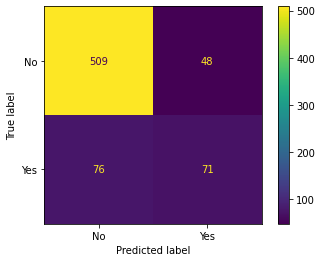

In [83]:
ConfusionMatrixDisplay.from_estimator(gscv_grad.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'])

## Summary:
**TASK: Analyze your results, which model performed best for you?**

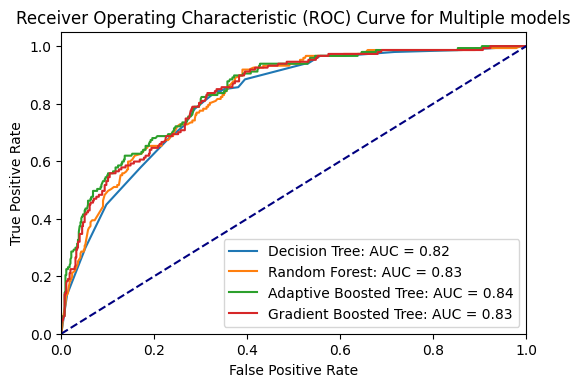

In [91]:
from sklearn.metrics import roc_curve, auc

def draw_ROC_curve(models):
    plt.figure(figsize=(6,4),dpi=100)
    for model_key, model_value in models.items():
        # Calculate the probabilities on the test set
        y_probs = model_key.best_estimator_.predict_proba(X_test)[:, 1]

        # Compute the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_probs,)

        # Compute the AUC
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_value}: AUC = {roc_auc:.2f}')
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for Multiple models')
    plt.legend(loc="lower right")
    plt.show()

models = {gscv:"Decision Tree", gscv_rfc:"Random Forest", gscv_ada:"Adaptive Boosted Tree", gscv_grad:"Gradient Boosted Tree"}
draw_ROC_curve(models=models)
    

The most important number we are aiming at, is minimising the True label Yes and predicted label No. (Left Bottom corner). (Means maximising The Yes Recall)
It is not a problem if we give discount to a customer who we predicted will churn, while in fact he will not. (Right Top corner)

But we dont want to lose a customer who will churn, but we predicted that he would not.

We chose the roc_auc scoring metric because it provided the best results for positive recall.

Therefore the best model will be simple Regression Tree.
Although Decision Tree has the lowest auc score, it has the best positive recall score.